The UCI Adult Census Income Dataset is a very common dataset used in machine learning for the task of predicting if a person's yearly income is above $50,000. The dataset contains a number of demographic features such as age, education, occupation, and others.R unning the K-Means algorithm on the UCI Adult Census Income Dataset would consist of steps to preprocess data, run the algorithm, hyperparameter tuning, and comparing how varying hyperparameters influence the effect.

1. Data Preprocessing- KMeans algorithm usually works on numerical data, but in our dataset we have both numerical and categorical data, so we need to encode it before using, its done by using onehotencoder.

a) Importing necessary libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


b) Loading the dataset

In [2]:
df = pd.read_csv("adult.csv")
print(df)

       age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   

c)The rows with missing values are removed

In [3]:
df = df.dropna(subset=['income'])

d) Separating the features and target

In [4]:
X = df.drop('income', axis=1)

e)Identifying numerical and categorical variables

In [5]:
numerical_columns=X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns=X.select_dtypes(include=['object']).columns.tolist()


f)Preprocessing for numerical data by dropping missing values and scale

In [6]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

g)Preprocessing for numerical data by dropping missing values and one-hot encode

In [7]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)])

i) Applying preprocessing

In [8]:
X_prep = preprocessor.fit_transform(X)

2.Appying kMeans -After completing the preprocessing, the next crucial step is applying k-means algorithm. A vital hyperparameter is the number of clusters (n_clusters). In this scenario,   the Elbow Method is used in determining a good number of clusters.


a)importing the libraries for doing this:-

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

b)Using elbow method, determinig the optimal of clusters

In [10]:
sse = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_prep)
    sse.append(km.inertia_)

c)Now we can plot the elbow curve

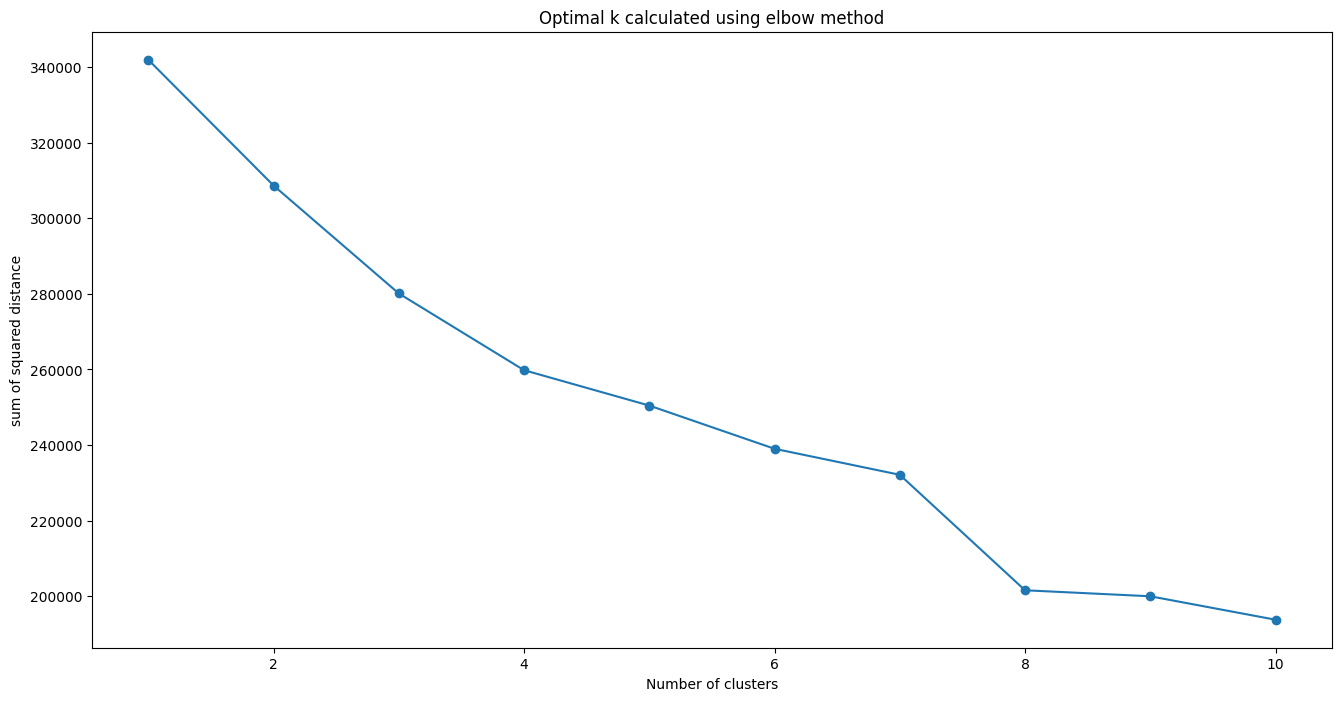

In [11]:
plt.figure(figsize=(16, 8))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('sum of squared distance')
plt.title('Optimal k calculated using elbow method')
plt.show()


The Elbow Method is a graphical representation of plotting the Within-Cluster Sum of Squares (WCSS) against the number of clusters (k). WCSS calculates the sum of squared distances of each data point from the centroid of the cluster to which it is assigned, and it represents compactness of the clusters.

With increasing clusters, WCSS decreases since points are closer to their respective centroids. But beyond a certain point, additional clusters do not provide much dividends, and the reduction in WCSS slows down. This turning point when the curve begins to curve and forms the shape of an "elbow" is the optimal number of clusters.

In the above graph, the optimal cluster number is found to be 4

3.Hyperparameter tuning - Another important parameter besides n_clusters is the initialization method (init). A comparison between the default 'k-means++' and 'random' initialization is presented below.

a)Define the optimal cluster number

In [12]:
optimal_k = 4

b)Initializing the k-Means using different init methods

In [13]:
km_plus =KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
km_random = KMeans(n_clusters=optimal_k, init='random', random_state=42)

c)Fit the models

In [14]:
km_plus.fit(X_prep)
km_random.fit(X_prep)

KMeans(init='random', n_clusters=4, random_state=42)

d)Comparing the inertia of kmeans plus and kmeans random

In [15]:
print(f'KMeans++ inertia: {km_plus.inertia_}')
print(f'Random inertia: {km_random.inertia_}')

KMeans++ inertia: 259801.78278946466
Random inertia: 259185.13477633888


From the result, the K-means random is having lower inertia compared to kmeans plus, so it is better for clustering.

4. Hyperparameter comparison- With this understanding, the effect of the different initialization methods can only be visualized if the clustered data is plotted. As the dataset has a high dimensionality, PCA reduces the dimensionality to two dimensions that can be visualized.


a) Importing the libraries

In [16]:
from sklearn.decomposition import PCA
import seaborn as sns

b)For visualization, the dimensionality is reduced

In [17]:
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_prep)

c)Adding cluster labels to the dataframe

In [18]:

df['cluster-kmeans++'] = km_plus.labels_
df['cluster-random'] = km_random.labels_

d)Plotting the clusters for k-means++

Text(0, 0.5, 'Principal Component 2')

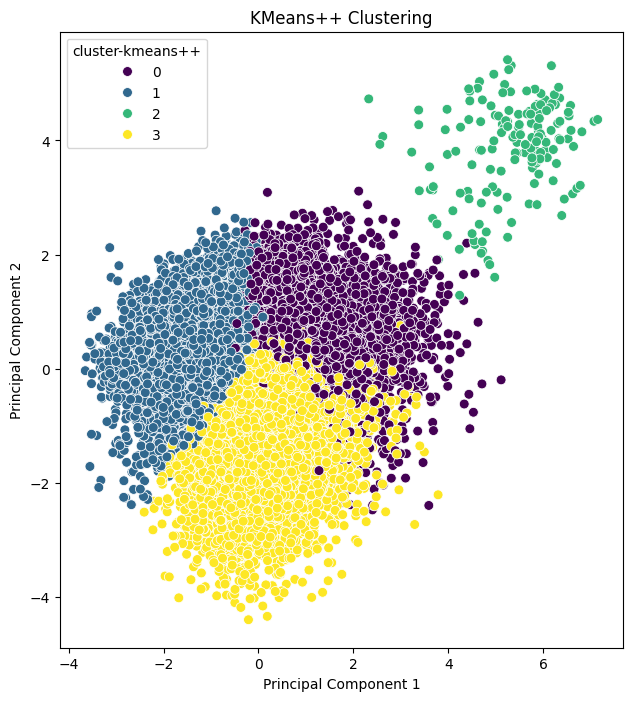

In [19]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster-kmeans++'], palette='viridis', s=50)
plt.title('KMeans++ Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


e)Plotting the clusters for random initialization

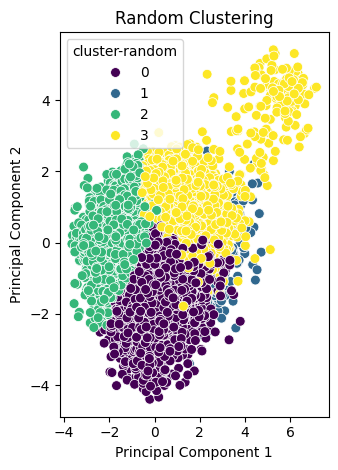

In [20]:
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster-random'], palette='viridis', s=50)
plt.title('Random Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()